## Set up Google Colab environment
! git clone "https://github.com/longyuxi/naive-sentiment-analyzer"
! mv naive-sentiment-analyzer/* ./
! rm -rf sample_data/
! rm -rf naive-sentiment-analyzer/

#### Run the following block of code every time you want to switch the thing you are concerned with

In [1]:
INPUT_TEXT = 'data/other-books/the-great-gatsby.txt'
OUTPUT_CSV = 'data/other-books/the-great-gatsby.csv'

#### Generates a csv file containing the sentiment information extracted from the text. This block does not need to be run if the csv file is already present (i.e. the information has been generated before).

In [2]:
import demensuris_analyze
demensuris_analyze.enhanced_analyze_text(INPUT_TEXT, OUTPUT_CSV)

## WordNet enhanced AFINN

#### Just for your curiosity, if you want to see what the WordNet enhanced AFINN score of a certain text is

In [3]:
# demensuris_analyze.enhanced_afinn('god')

## Plots the sentiment score as a function of sentence count based on the data in OUTPUT_CSV

Note: The black dotted line is zero

#### Plot against sentence count

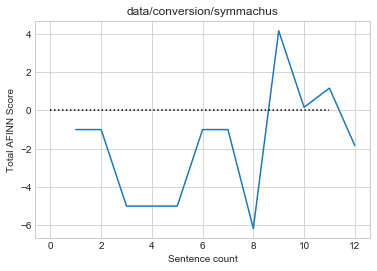

In [4]:
# Plot against sentence count
import matplotlib.pyplot as plt
import csv
import numpy as np
plt.style.use('seaborn-whitegrid')

with open(OUTPUT_CSV) as csvfile:
    csvreader = csv.reader(csvfile)
    csvdatahorizontal = list(csvreader)
    csvdatahorizontal = csvdatahorizontal[1:]
    numpy_array = np.array(csvdatahorizontal)
    csvdatavertical = numpy_array.T
    csvdatavertical = csvdatavertical.astype(float)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(csvdatavertical[0],csvdatavertical[3])
    ax.plot(np.zeros(len(csvdatavertical[4])), 'k:')
    ax.set_title(OUTPUT_CSV[:-4])
    ax.set_xlabel("Sentence count")
    ax.set_ylabel("Total AFINN Score")

#### Plot against word count

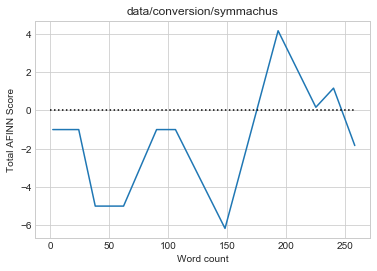

In [5]:
# Plot against word count
import matplotlib.pyplot as plt
import csv
import numpy as np
plt.style.use('seaborn-whitegrid')

with open(OUTPUT_CSV) as csvfile:
    csvreader = csv.reader(csvfile)
    csvdatahorizontal = list(csvreader)
    csvdatahorizontal = csvdatahorizontal[1:]
    numpy_array = np.array(csvdatahorizontal)
    csvdatavertical = numpy_array.T
    csvdatavertical = csvdatavertical.astype(float)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(csvdatavertical[4],csvdatavertical[3])
    ax.plot(np.zeros(int(csvdatavertical[4][-1])), 'k:')
    ax.set_title(OUTPUT_CSV[:-4]) 
    ax.set_xlabel("Word count")
    ax.set_ylabel("Total AFINN Score")
